## Discount factor
**Discount factor**  - это параметр, используемый в теории управления и обучении с подкреплением для оценки стоимости будущих вознаграждений. Он обозначается символом $\gamma$ (гамма).

В контексте задачи обучения с подкреплением, такой как у **DQN** алгоритма, фактор дисконтирования применяется к будущим вознаграждениям, чтобы учесть уменьшение их значения с течением времени. Фактор дисконтирования позволяет агенту принимать во внимание не только мгновенные вознаграждения, но и будущие вознаграждения, приводя к более долгосрочной стратегии.

**Формула для дисконтирования будущих вознаграждений** выглядит следующим образом:

 $G_t$ = $R_{t+1}$ + $\gamma$ $R_{t+2}$ + $\gamma$^2 $R_{t+3}$ + $\ldots$ = $\sum_{k=0}^{\infty}$ $\gamma$^k $R_{t+k+1}$

где:
- $G_t$ - дисконтированная сумма вознаграждений (вознаграждение с учетом будущих шагов);
- $R_{t+k+1}$ - вознаграждение, полученное на шаге $t+k+1$;
- $\gamma$ - фактор дисконтирования,  $0 \leq \gamma \leq 1$.

Фактор дисконтирования имеет важное значение при принятии решений в условиях неопределенности, где агенту нужно учитывать как мгновенные, так и будущие вознаграждения, с учетом их временного удаления. Выбор подходящего значения для фактора дисконтирования может влиять на стратегии обучения.


## Long-term и Short-term стратегия

Фактор дисконтирования оказывает сильное влияние на долгосрочность стратегии.
В контексте обучения с подкреплением и стратегий агента, термины "краткосрочные" и "долгосрочные" относятся к временным характеристикам принятия решений агентом.

**Краткосрочные стратегии**:

> Агент, придерживающийся краткосрочной стратегии, ориентируется в основном на текущую информацию и мгновенные вознаграждения.
Такой агент может принимать решения, которые приносят максимальное мгновенное вознаграждение, не уделяя большого внимания будущим шагам. Такой агент может принимать решения, которые приносят максимальное мгновенное вознаграждение, не уделяя большого внимания будущим шагам.




**Долгосрочные стратегии**:


> Агент, придерживающийся долгосрочной стратегии, учитывает будущие вознаграждения и последствия своих действий на протяжении более длительного времени.
Такой агент может предпочесть действия, которые могут не приносить максимальное мгновенное вознаграждение, но могут способствовать достижению более высоких наград в будущем.

Когда говорят о краткосрочных или долгосрочных стратегиях в контексте обучения с подкреплением, обычно имеется в виду, как агент принимает решения, оптимизируя сумму будущих вознаграждений. Фактор дисконтирования γ в уравнении обучения с подкреплением регулирует степень учета будущих вознаграждений, и, таким образом, влияет на то, насколько агент ориентирован на краткосрочные или долгосрочные перспективы.

## Метрики для оценки модели
В данной работе мы рассмотрим некоторые метрики, которые могут быть использованы для оценки обучения модели.
Аналогично первой лабораторной работы мы будем решать задачу в окружении MountainCar-v0, а в качестве модели используем уже знакомый DQN. При этом мы обучим модель несколько разных с разным параметром Discount factor.

Для оценки модели мы рассмотрим следущие метрики:

*   Q-values, их поведение и сходимость.
*   Средняя награда за эпизод.
*   Время затрачиваемое на обучение модели.








### Установка зависимостей

На первом шаге мы начинаем с установки необходимых библиотек. Пакет [gymnasium](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) предоставляет различные среды для обучения с подкреплением, в то время как [stable-baselines3](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) предоставляет реализации различных алгоритмов обучения с подкреплением.

In [ ]:
!apt install -y swig
!pip install 'shimmy>=0.2.1'
# Установка необходимых библиотек
!pip install gymnasium stable-baselines3 gymnasium[box2d]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,485 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
import torch as th
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import time

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.01, mean_reward:-200.00 +/- 0.00
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -2.1e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 12616    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19801    |
----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 199       |
|    ep_rew_mean      | -2.03e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 200       |
|    fps              | 12939     |
|    time_elapsed     | 3         |
|    total_timesteps  | 39745     |
-----------------------------------
-----------------------------------
| rollout/     

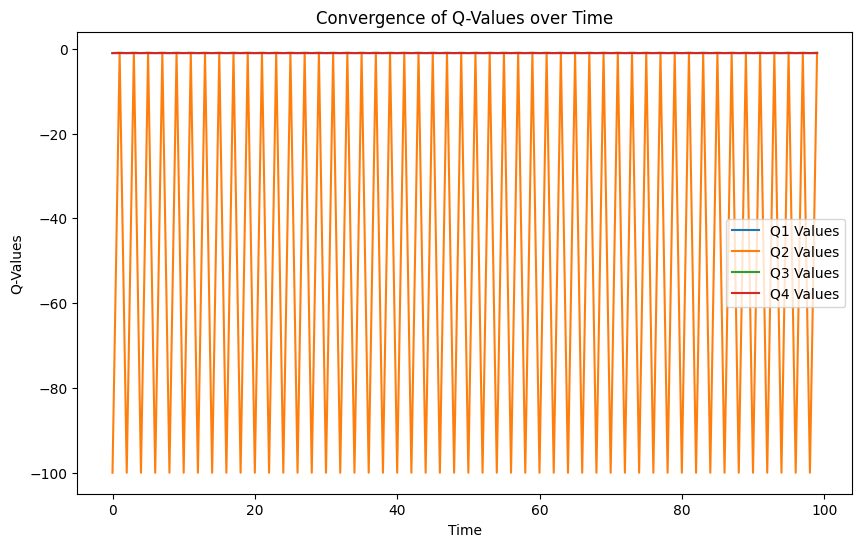

Время обучения модели при discount_factor = 0.01 : 36.95300579071045 секунд.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.5, mean_reward:-200.00 +/- 0.00
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 200       |
|    ep_rew_mean      | -2.11e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 100       |
|    fps              | 11166     |
|    time_elapsed     | 1         |
|    total_timesteps  | 20000     |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 197       |
|    ep_rew_mean      | -1.99e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 200       |
|    fps              | 12136     |
|    time_elapsed     | 3         |
|    total_timesteps  | 39663     |


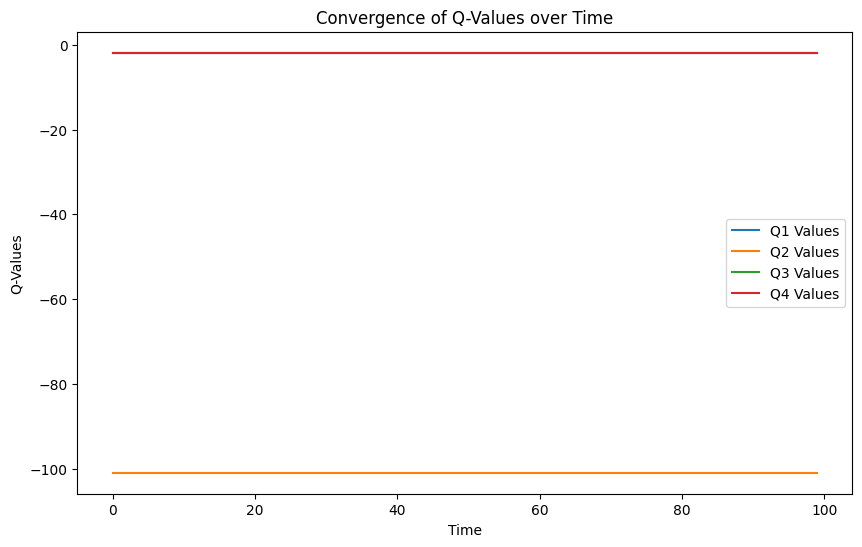

Время обучения модели при discount_factor = 0.5 : 37.30998396873474 секунд.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.99, mean_reward:-200.00 +/- 0.00
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 199       |
|    ep_rew_mean      | -2.07e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 100       |
|    fps              | 13055     |
|    time_elapsed     | 1         |
|    total_timesteps  | 19883     |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 197       |
|    ep_rew_mean      | -2.12e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 200       |
|    fps              | 12254     |
|    time_elapsed     | 3         |
|    total_timesteps  | 39627     |


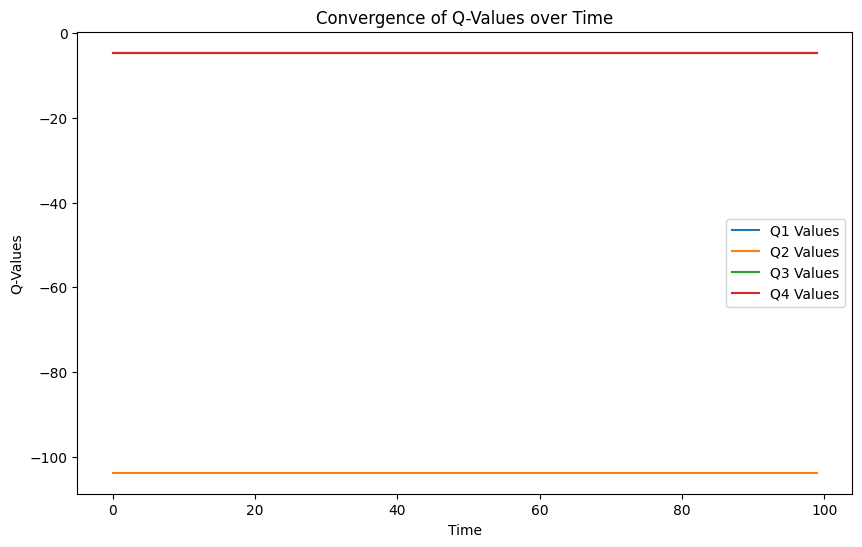

Время обучения модели при discount_factor = 0.99 : 37.033390283584595 секунд.


In [ ]:
def q_values(model: DQN, obs: np.ndarray) -> np.ndarray:
  # Доступ к Q-network
  q_net = model.q_net

  # Конвертируем observation в PyTorch tensor
  obs_tensor = th.tensor(obs, dtype=th.float32)

  # Изменяем размерность
  obs_tensor = obs_tensor.unsqueeze(0)

  #Извлекаем Q-values
  q_values = model.q_net.forward(obs_tensor)

  return q_values.detach().numpy()[0]


def plot_q_values(q_values_list):
    # Построение графика
    plt.figure(figsize=(10, 6))
    for i in range(q_values_list.shape[1]):
        plt.plot(q_values_list[:, i], label=f'Q{i+1} Values')
    plt.xlabel('Time')
    plt.ylabel('Q-Values')
    plt.title('Convergence of Q-Values over Time')
    plt.legend()
    plt.show()

def mean_reward(discount_factor):
    # Создание окружения
    env = gym.make("CliffWalking-v0", max_episode_steps=400)

    # Удаление обертки TimeLimit
    #env = env.unwrapped

    # Создание модели
    model = DQN("MlpPolicy", env, verbose=1, gamma=discount_factor)

    # Количество эпизодов для оценки модели
    n_eval_episodes = 250

    # Оценка модели до обучения
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_eval_episodes, deterministic=True)
    print(f"До обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

    # Засекаем начальное время
    start_time = time.time()

    # Обучение модели
    model.learn(total_timesteps=100000, log_interval=100)

    # Засекаем время завершения
    end_time = time.time()

    # Оценка модели после обучения
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_eval_episodes, deterministic=True)
    print(f"После обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
    model.save(f"dqn_CliffWalking-v0_{discount_factor}")
    del model

    # Вычисляем время обучения
    learn_time = end_time - start_time
    return env, learn_time  # <-- Return both environment and learn_time


def q_values_calculation(discount_factor, env):
    # Загружаем созданную и сохраненную модель
    model = DQN.load(f"dqn_CliffWalking-v0_{discount_factor}")

    # В CliffWalking окружении возможны только 4 действия
    action_str = ['move up', 'move right', 'move down', 'move left']
    q_values_list = []

    obs, info = env.reset()
    for _ in range(100):
        q_val = q_values(model, obs)
        q_values_list.append(q_val)
        action, _states = model.predict(obs, deterministic=True)

        action = int(action)

        print(f'obs: {obs}')
        print(f"Q-value состояния: {q_val}")
        print(f"Действие: {action_str[action]}")

        obs, reward, terminated, truncated, info = env.step(action)

    q_values_array = np.array(q_values_list)
    return q_values_array

discount_factors = [0.01, 0.5, 0.99]
environment, time_to_lrn = mean_reward(discount_factors[0])
obs = environment.reset()


q_vals = q_values_calculation(discount_factors[0], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[0]} : {time_to_lrn} секунд.')
# Закрытие среды
environment.close()

environment, time_to_lrn = mean_reward(discount_factors[1])
q_vals = q_values_calculation(discount_factors[1], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[1]} : {time_to_lrn} секунд.')
# Закрытие среды
environment.close()

environment, time_to_lrn = mean_reward(discount_factors[2])
q_vals = q_values_calculation(discount_factors[2], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[2]} : {time_to_lrn} секунд.')
# Закрытие среды
environment.close()
